In [2]:
from RVI import addRVI
import pandas as pd
import yfinance as yf
from getDataFrame import getTickerDF
import seaborn as sns

In [5]:
s = yf.Ticker("MSFT")
df = s.history(period = "5y", i = "1d").loc[:, ["Open", "High", "Low", "Close", "Volume"]]
df = addRVI(df)

RVIdivergence = df["RVIDivergence"]
crossover = df["RVICrossover"]
price = (df["High"] + df["Low"] + df["Close"])/3

<AxesSubplot:>

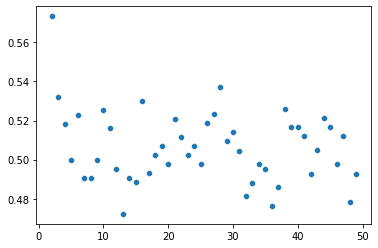

In [6]:
days = []
accuracy = [] 
for i in range(2,50):
    ts = 0
    fs = 0
    for j in range(0, len(crossover)-i):
        if crossover[j] == "Sell" and price[j] < price[j+i]:
            fs += 1
        elif crossover[j] == "Buy" and price[j] > price[j+i]:
            fs += 1
        elif crossover[j] == "Buy" and price[j] < price[j+i]:
            ts += 1
        elif crossover[j] == "Sell" and price[j] > price[j+i]:
            ts += 1
    days.append(i)
    accuracy.append(ts/(ts+fs))

sns.scatterplot(x=days, y = accuracy)

<AxesSubplot:>

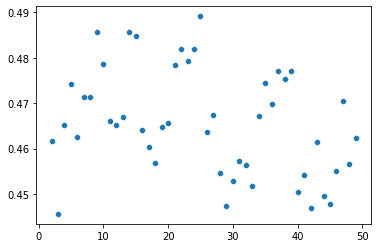

In [7]:
days = []
accuracy = [] 
for i in range(2,50):
    ts = 0
    fs = 0
    for j in range(0, len(RVIdivergence)-i):
        if RVIdivergence[j] == "Sell" and price[j] < price[j+i]:
            fs += 1
        elif RVIdivergence[j] == "Buy" and price[j] > price[j+i]:
            fs += 1
        elif RVIdivergence[j] == "Buy" and price[j] < price[j+i]:
            ts += 1
        elif RVIdivergence[j] == "Sell" and price[j] > price[j+i]:
            ts += 1
    days.append(i)
    accuracy.append(ts/(ts+fs))

sns.scatterplot(x=days, y = accuracy)